# FINAL PROJECT : Forest Cover Type Prediction


### AIDI-1002




## Dataset description

Data Fields:

**Elevation** - Elevation in meters

**Aspect** - Aspect in degrees azimuth

**Slope** - Slope in degrees

**Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features

**Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features

**Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway

**Hillshade_9am** (0 to 255 index) - Hillshade index at 9am, summer solstice

**Hillshade_Noon** (0 to 255 index) - Hillshade index at noon, summer solstice

**Hillshade_3pm** (0 to 255 index) - Hillshade index at 3pm, summer solstice

**Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points

**Wilderness_Area** (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation

**Soil_Type** (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

**Cover_Type** (7 types, integers 1 to 7) - Forest Cover Type designation


### Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
train_df=pd.read_csv('train.csv')
train_df['Cover_Type'] = pd.Categorical(train_df['Cover_Type'])
train_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Id                                  15120 non-null  int64   
 1   Elevation                           15120 non-null  int64   
 2   Aspect                              15120 non-null  int64   
 3   Slope                               15120 non-null  int64   
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64   
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64   
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64   
 7   Hillshade_9am                       15120 non-null  int64   
 8   Hillshade_Noon                      15120 non-null  int64   
 9   Hillshade_3pm                       15120 non-null  int64   
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64   
 11  Wilderness_Area1            

All data are type of int64 

## Exploratory data analysis

In the original data, **Soil_Type** and **Wilderness_Area** are binary code which are encoded by method one-hot. To do EDA, reverse the encoding first. And drop column **ID** which has no real meaning for analysis.

In [3]:
# reverse the one hot encoding of Soil_Type and Wilderness_Area
def reverse_encoding(df,colname, num):
    cols=[]
    df[colname] = 0
    for i in range(1,num+1):
        col=f'{colname}{i}'
        cols.append(col)
        df.loc[df[col]==1, colname] = i
    return df.drop(cols,axis=1)

eda_df = reverse_encoding(train_df, 'Soil_Type', 40)
eda_df = reverse_encoding(eda_df, 'Wilderness_Area', 4)
eda_df = eda_df.drop('Id',axis=1)

### Correlation analysis

Examine the correlation between ecah features.

List columns with correlation value great than 50%

In [4]:
import numpy as np
import seaborn as sns

def encodeDataset(df):
    df2 = pd.DataFrame()
    for col in df.columns:
        if df[col].dtypes=='int64' or df[col].dtypes=='float':
            df2[col] = df[col]
        else:
            df2[col] = df[col].astype("category").cat.codes
    return df2
corr = encodeDataset(eda_df).corr()
display(corr.reset_index().melt(id_vars='index').query('value>0.5 and value<1'))

,index,variable,value
5,Horizontal_Distance_To_Roadways,Elevation,0.578659
11,Soil_Type,Elevation,0.826721
21,Hillshade_3pm,Aspect,0.635022
43,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology,0.652142
55,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,0.652142
65,Elevation,Horizontal_Distance_To_Roadways,0.578659
99,Hillshade_3pm,Hillshade_Noon,0.614526
105,Aspect,Hillshade_3pm,0.635022
111,Hillshade_Noon,Hillshade_3pm,0.614526
143,Elevation,Soil_Type,0.826721


Display the correlation map. **Cover_Type** do not have obviously relation with others.

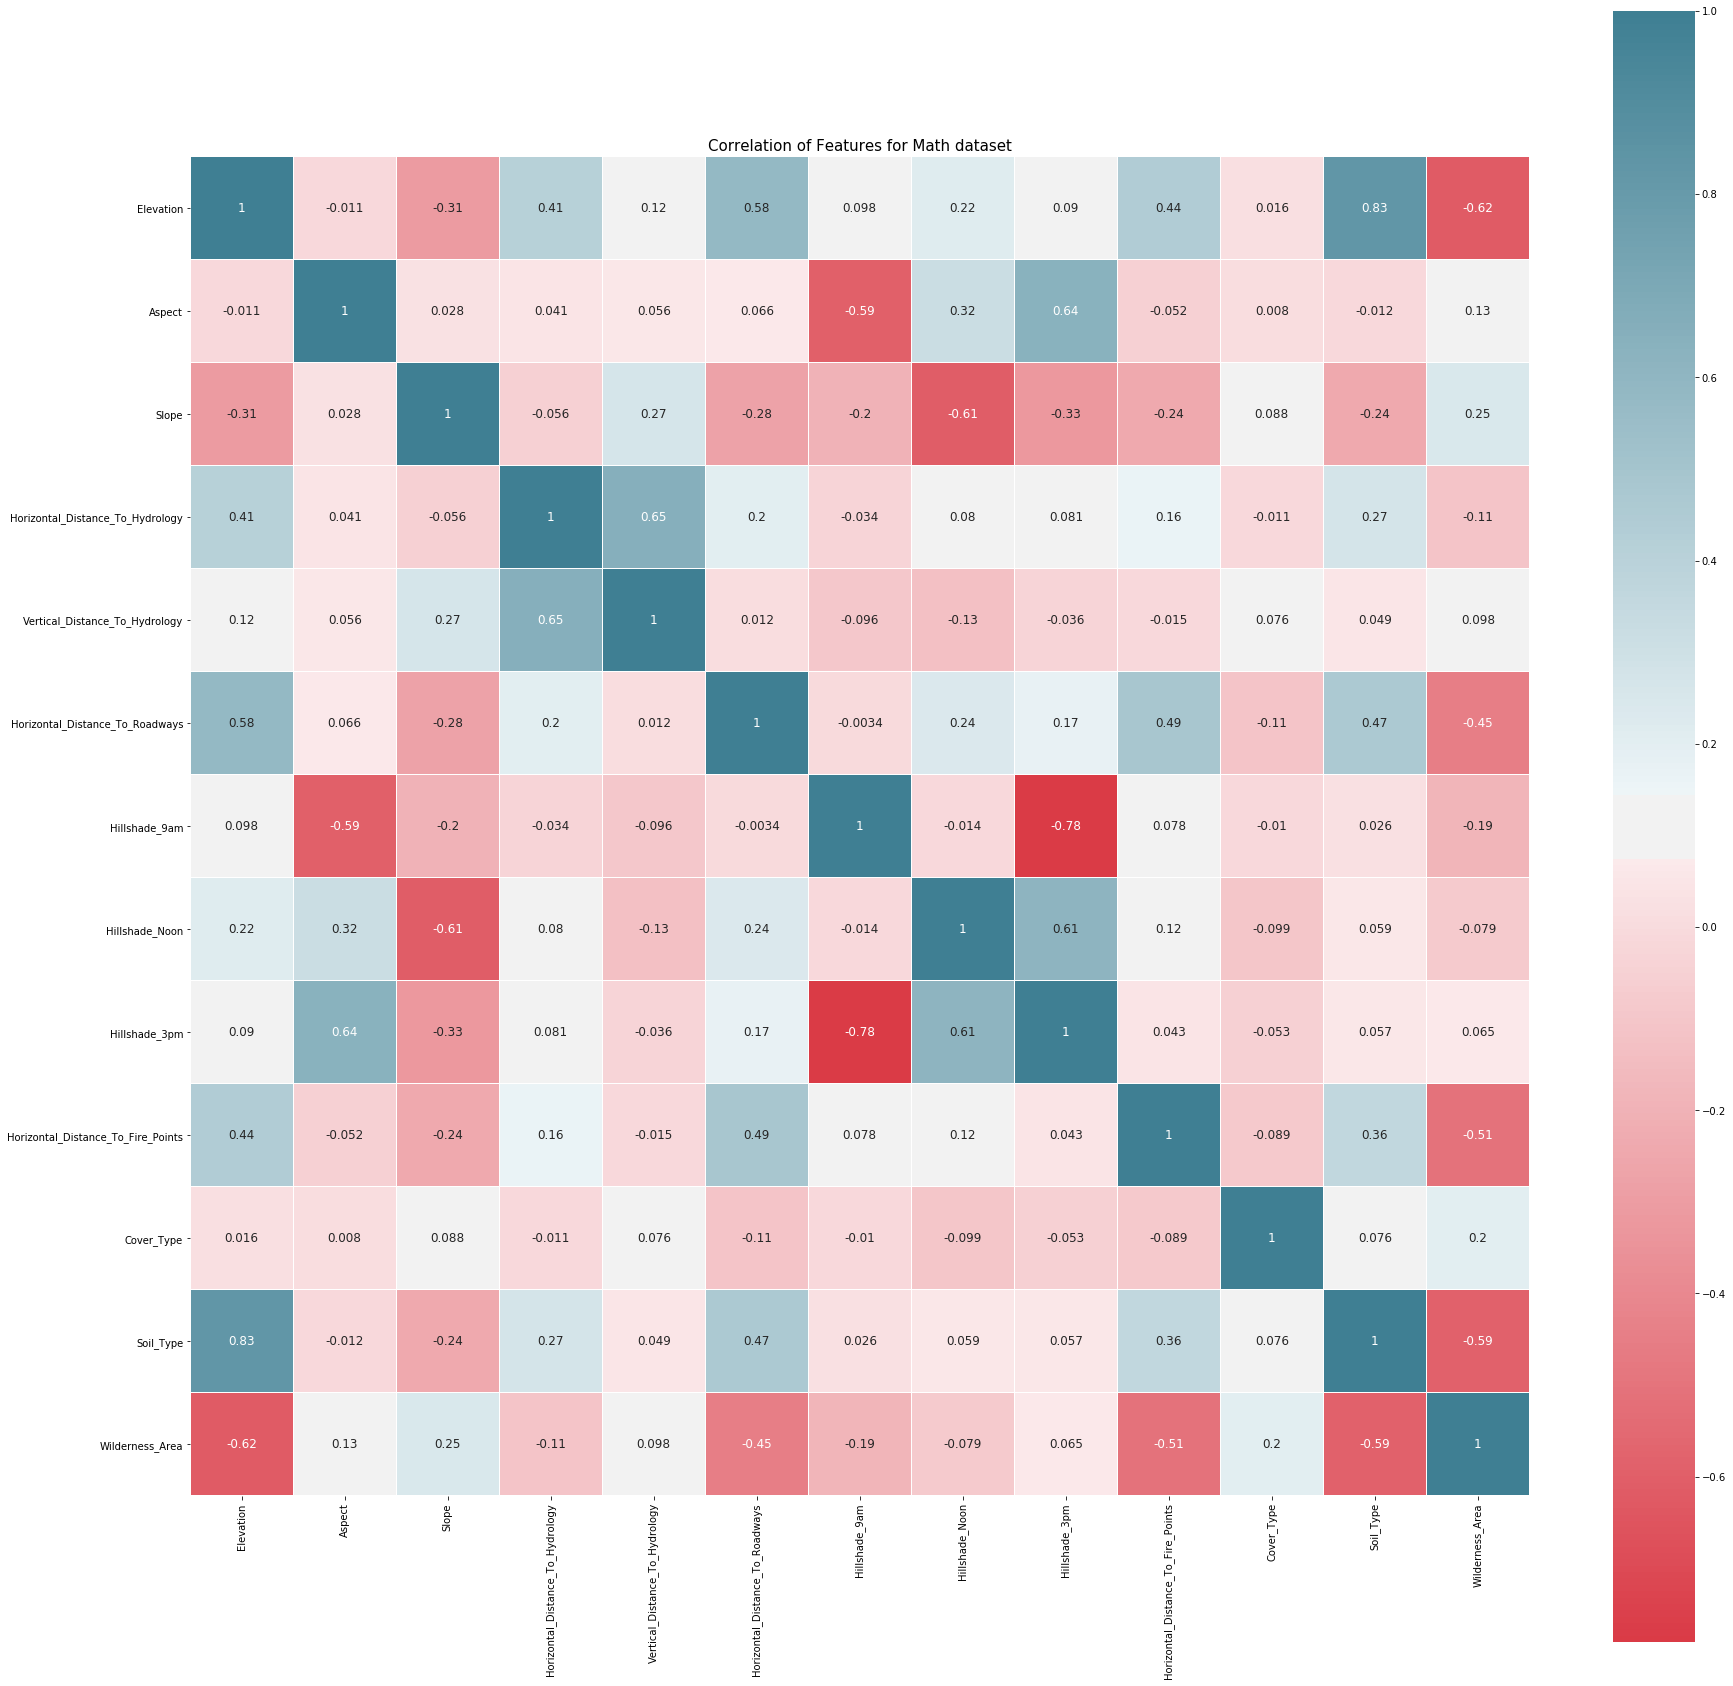

In [5]:
plt.figure(figsize=(30,30))
plt.title('Correlation of Features for Math dataset', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(corr,
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

Show some columns with correlation apparently

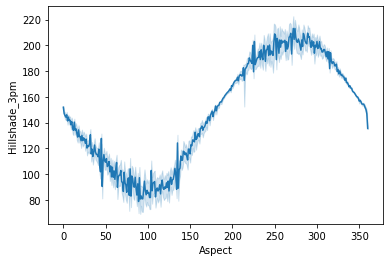

In [6]:
sns.lineplot(x= "Aspect",y="Hillshade_3pm",data=eda_df)

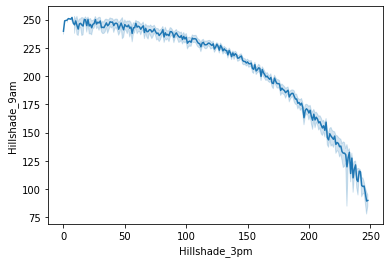

In [7]:
sns.lineplot(x= "Hillshade_3pm",y="Hillshade_9am",data=eda_df)

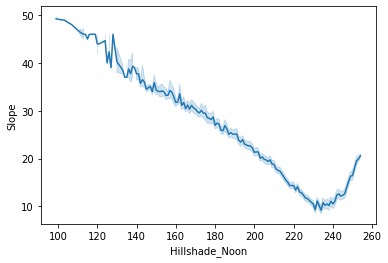

In [8]:
sns.lineplot(x= "Hillshade_Noon",y="Slope",data=eda_df)

Show pairplot chart for features to check if there are more relations between them.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


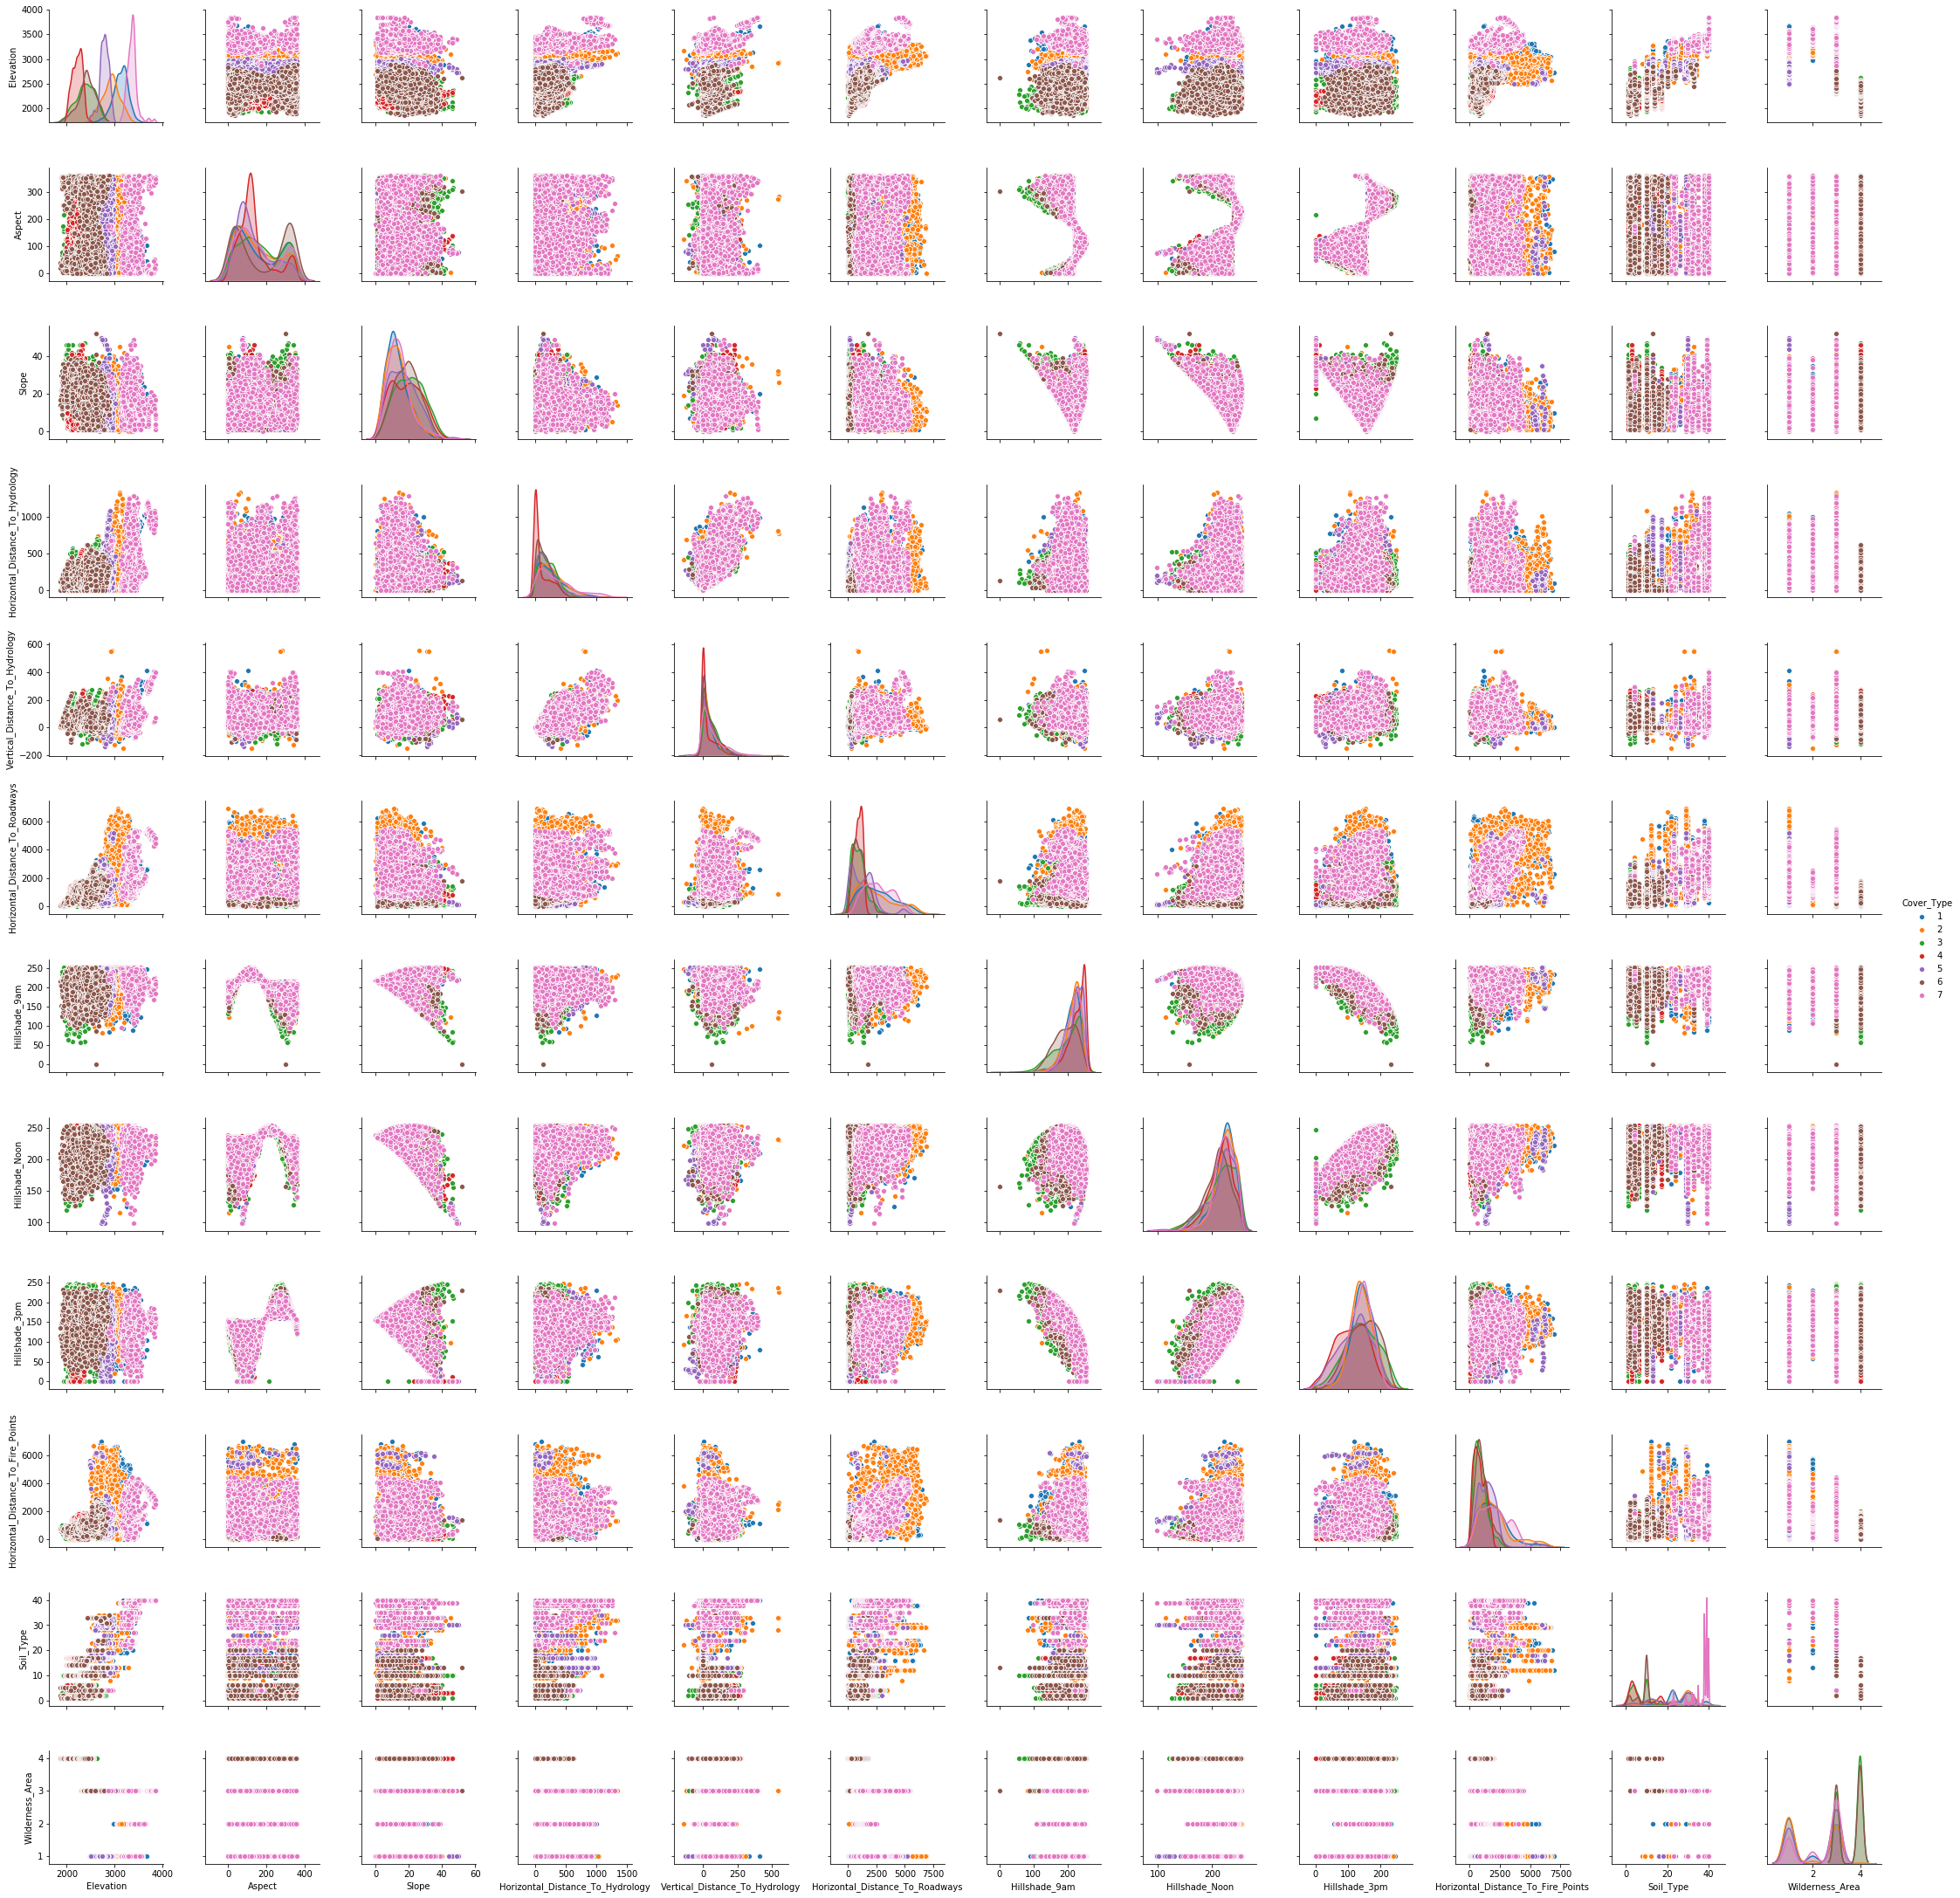

In [9]:
vars = [x for x in eda_df.columns if x not in ['Id', 'Cover_Type']]

g = sns.pairplot(eda_df, vars=vars, hue="Cover_Type")

From the pairplot chart, we can see Soil_Type, Wilderness_Area, Elevation do have more correlation with Cover_Type, compared with other features.

Check **Wilderness_Area**. Some Cover_Type only exist in some specific areas.

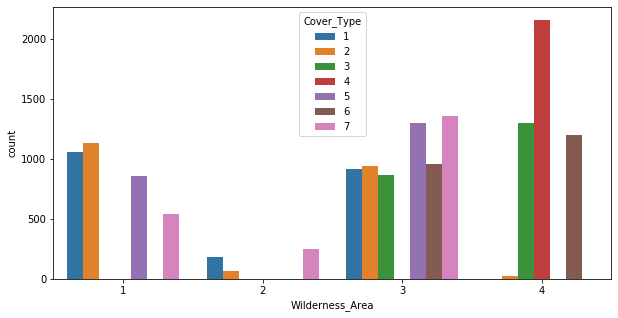

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Wilderness_Area',data=eda_df ,hue='Cover_Type')

Check Soil_Type. Some Cover_Type only exist in some specific Soil_Type.

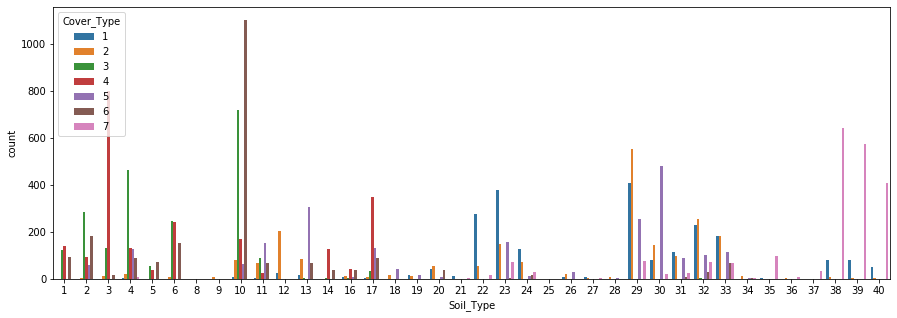

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x='Soil_Type',data=eda_df ,hue='Cover_Type')

## Algorithms and modules

List algorithms

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import LinearRegression  
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
def decisionTree():
    dt = DecisionTreeClassifier()
    return dt
def knn():
    knn = KNeighborsRegressor(n_neighbors=1)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=0, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=0)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto',max_iter=10000)
    return clf

def nn():
    clf = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=0,max_iter=10000)
    return clf

def LR():
    clf = LogisticRegression(solver='lbfgs', max_iter=100000)
    return clf

def NB():
    clf = GaussianNB()
    return clf

def allmodels():
    return {
    #    'NN':nn(),
        #'SVM':svm(),
        #'Logistic Regression': LR(),
        'Linear Regression': LinearRegression(),
        'Naive Bayes': GaussianNB(),
        'KNN':knn(),
        'Decision Tree': decisionTree(),
        'Random Forest': randomForestRegressor(),
        'Extra Tree': extraTreesRegressor(),
    }

### Set up KFold Cross Validation


In [13]:
def norm(df):
    for col in df.columns:
        mean1 = np.mean(df[col])
        std1 = np.std(df[col])
        df[col] = (df[col].values - mean1)/std1
    return df

def important_features(model, X_df):
    importances = 'No importances features'
    if hasattr(model, 'coef_'):
        if len(model.coef_)==len(X_df.columns):
            importances = pd.DataFrame({"Feature":X_df.columns.tolist(),"Coefficients":np.abs([x for x in model.coef_])})
        else:
            importances = pd.DataFrame({"Feature":X_df.columns.tolist(),"Coefficients":np.abs(model.coef_[0])})
        importances = importances.sort_values('Coefficients',ascending=False).reset_index(drop=True)
    if hasattr(model, 'feature_importances_'):
        importances =  pd.DataFrame({"Feature":X_df.columns.tolist(),"Coefficients":model.feature_importances_})
        importances= importances.sort_values('Coefficients',ascending=False).reset_index(drop=True)
    return importances

def CrossValidation(df, models=allmodels(), doNorm = False,predictCol = 'Cover_Type', showImportance = False, pca_components=0):
    Y_df = df[predictCol]
    X_df = df.drop([predictCol], axis = 1) 
    if doNorm==True:
        X_df = norm(X_df)
    kf = KFold(n_splits=5)
    model_result = pd.DataFrame(columns =  ['Algorithm','fold 1','fold 2','fold 3','fold 4','fold 5','fold mean'])
    for key,v in models.items():
        result = [key]
        estimator = v
        for train_index, test_index in kf.split(df):
            if pca_components>0:
                #print('PCA')
                pca = PCA(n_components=pca_components)
                X_train = pca.fit_transform(X_df.loc[train_index])
                X_test = pca.transform(X_df.loc[test_index])
                estimator.fit(X_train,Y_df.loc[train_index])
                predict_Y = estimator.predict(X_test).round(0).astype(int)
                
                #score = estimator.score(X_test,Y_df.loc[train_index])
                score = accuracy_score(list(Y_df.loc[test_index]), list(predict_Y))
            else:
                estimator.fit(X_df.loc[train_index],Y_df.loc[train_index])
                #score = estimator.score(X_df.loc[train_index],Y_df.loc[train_index])
                predict_Y = estimator.predict(X_df.loc[test_index]).round(0).astype(int)
                score = accuracy_score(list(Y_df.loc[test_index]), list(predict_Y))
                #display('A:',Y_df.loc[train_index])
                #display('B:',predict_Y)
            #score = estimator.score(X_df.loc[test_index], Y_df.loc[test_index])
            #score = mean_absolute_error(Y_df.loc[test_index],predict_Y)
            result.append(score)
        if showImportance == True:
            importances = important_features(estimator, X_df)
            display(f'{key} , fold {len(result)}, {type(importances)}:')
            if type(importances) != str:
                display(importances[0:17].transpose())
        result.append(np.mean(result[1:6]))
        model_result.loc[len(model_result), :] = result
    model_result= model_result.sort_values('fold mean',ascending=False).reset_index(drop=True)
    #display( model_result)
    return model_result


## Feature analysis

Use two methods for feature analysis

- PCA

- K Best


#### Principal Components Analysis (PCA)

First 3 features has 96.040% importance rate


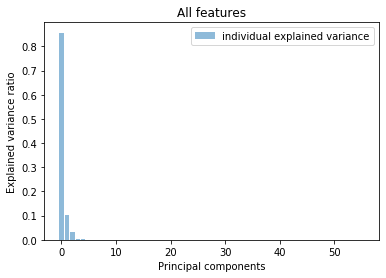

First 3 features has 94.759% importance rate


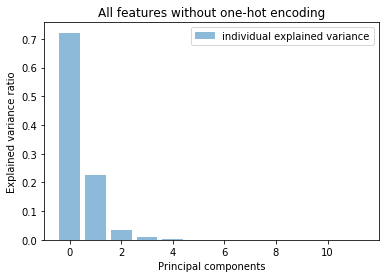

In [14]:
from sklearn.decomposition import PCA

def PCAAnalysis(df, title):
    df2 = df.drop(['Cover_Type'],axis=1)

    pca = PCA()
    X = pca.fit_transform(df2)

    evr = pca.explained_variance_ratio_
    print(f'First 3 features has {np.sum(evr[0:2]):.3%} importance rate')
    plt.bar(range(len(evr)), evr, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title(title)
    #plt.tight_layout()
    plt.show()


PCAAnalysis(train_df, 'All features')
PCAAnalysis(eda_df, 'All features without one-hot encoding' )

According to PCA, We can mainly 3 features are most important for prediction

Below is to check the prediction result with different pca_components settings. With PCA, we can reduce the dimension from **10** to **3**, which also have a good result.

1


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Naive Bayes,0.179233,0.310516,0.209325,0.136243,0.274802,0.222024
1,KNN,0.20668,0.197751,0.183201,0.208003,0.231151,0.205357
2,Decision Tree,0.20668,0.197751,0.183201,0.208003,0.231151,0.205357
3,Extra Tree,0.189484,0.224537,0.154762,0.145503,0.190807,0.181019
4,Random Forest,0.184524,0.227513,0.134259,0.120701,0.180556,0.169511
5,Linear Regression,0.0462963,0.467923,0.0241402,0.00330688,0.175265,0.143386


2


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Decision Tree,0.341931,0.315476,0.262566,0.313161,0.343585,0.315344
1,KNN,0.347884,0.305886,0.25959,0.306878,0.356151,0.315278
2,Naive Bayes,0.284392,0.26422,0.210648,0.20172,0.29332,0.25086
3,Extra Tree,0.266534,0.31713,0.150463,0.165344,0.241071,0.228108
4,Random Forest,0.249669,0.335979,0.127315,0.141865,0.219907,0.214947
5,Linear Regression,0.0634921,0.467923,0.0241402,0.00330688,0.175265,0.146825


3


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,KNN,0.604497,0.650794,0.561508,0.628638,0.708333,0.630754
1,Decision Tree,0.553241,0.591931,0.518188,0.609458,0.654762,0.585516
2,Naive Bayes,0.422619,0.482143,0.418651,0.434854,0.495701,0.450794
3,Extra Tree,0.420966,0.502976,0.289021,0.349537,0.459656,0.404431
4,Random Forest,0.328042,0.466931,0.208003,0.273479,0.362765,0.327844
5,Linear Regression,0.0439815,0.47123,0.0297619,0.00992063,0.177579,0.146495


4


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,KNN,0.686177,0.746032,0.668651,0.723545,0.808201,0.726521
1,Decision Tree,0.619378,0.678241,0.595569,0.667989,0.723876,0.657011
2,Naive Bayes,0.478836,0.48578,0.416336,0.44213,0.486442,0.461905
3,Extra Tree,0.463624,0.540013,0.323082,0.404762,0.53836,0.453968
4,Random Forest,0.393849,0.517526,0.271164,0.339286,0.470569,0.398479
5,Linear Regression,0.0439815,0.474868,0.0251323,0.0142196,0.186508,0.148942


5


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,KNN,0.704365,0.801257,0.699405,0.741071,0.83631,0.756481
1,Decision Tree,0.642196,0.708003,0.626323,0.681548,0.771495,0.685913
2,Naive Bayes,0.471561,0.52381,0.431878,0.435516,0.504299,0.473413
3,Extra Tree,0.473545,0.56746,0.317791,0.405093,0.569775,0.466733
4,Random Forest,0.400794,0.519511,0.243386,0.305225,0.470238,0.387831
5,Linear Regression,0.0436508,0.474868,0.0244709,0.0109127,0.185185,0.147817


6


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,KNN,0.707341,0.804563,0.703373,0.743386,0.842593,0.760251
1,Decision Tree,0.64881,0.699074,0.618056,0.67295,0.762566,0.680291
2,Naive Bayes,0.472553,0.518519,0.421627,0.454365,0.511905,0.475794
3,Extra Tree,0.438823,0.557209,0.299934,0.38922,0.546958,0.446429
4,Random Forest,0.345238,0.497354,0.226521,0.268849,0.409722,0.349537
5,Linear Regression,0.0529101,0.411706,0.0618386,0.0294312,0.181878,0.147553


7


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,KNN,0.712302,0.815476,0.708003,0.743717,0.847222,0.765344
1,Decision Tree,0.645833,0.708333,0.604828,0.657738,0.763889,0.676124
2,Naive Bayes,0.475529,0.549934,0.407738,0.455688,0.52414,0.482606
3,Extra Tree,0.430225,0.556878,0.300265,0.364749,0.521495,0.434722
4,Random Forest,0.320106,0.481481,0.198413,0.222553,0.386574,0.321825
5,Linear Regression,0.0548942,0.39914,0.0618386,0.0281085,0.182209,0.145238


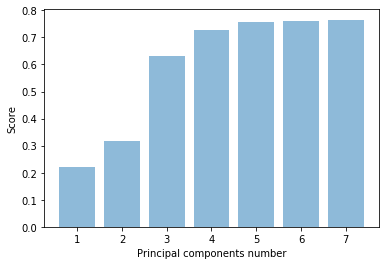

In [15]:
#df = eda_df.drop(['Cover_Type'],axis=1)
#display(df)
X = [x for x in range(1,min(8,len(eda_df.columns)))]
Y = []
for n in X:
    print(n)
    model_result = CrossValidation(eda_df, doNorm = False, showImportance=False, pca_components = n)
    display(model_result)
    Y.append(model_result.loc[0,'fold mean'])
plt.bar(X, Y, alpha=0.5, align='center')
plt.ylabel('Score')
plt.xlabel('Principal components number')
#plt.ylim(5,2.5)
plt.show()


### KBest

Get the score of best features with **SelectKBest** method. Check the prediction result with 15 most important features 

In [16]:
from sklearn.feature_selection import SelectKBest, chi2

def get_feature_importance(feature_data,label_data,k):
    model = SelectKBest(chi2, k)
    X_new = model.fit_transform(feature_data, label_data)
    ret = pd.DataFrame({'Feature':feature_data.columns,'score':model.scores_,'p-value':model.pvalues_})
    ret = ret.sort_values('score',ascending=False).reset_index(drop=True)
    scores = model.scores_
    #print('model scores:', scores) 
 
    p_values = model.pvalues_
    #print('model p-values', p_values)
 
    indices = np.argsort(scores)[::-1]
    k_best_features = list(feature_data.columns.values[indices[0:k]])
 
    #print('k best features are: ',k_best_features)
    display(ret)
    return k_best_features,ret

from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X = eda_df.drop(['Cover_Type'],axis=1)
Y = eda_df['Cover_Type']
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#display(X)
k=5
print(f'Check {k} best features:')
cols,ret = get_feature_importance(X,Y,k)
print('k best features are: ',cols[0:k])
print(f'Prediciton with {k} best features')


Check 5 best features:


,Feature,score,p-value
0,Soil_Type,2455.599316,0.000000e+00
1,Wilderness_Area,1875.559841,0.000000e+00
2,Elevation,1297.239732,4.288061e-277
3,Horizontal_Distance_To_Roadways,734.718983,1.946781e-155
4,Horizontal_Distance_To_Fire_Points,395.568520,2.506872e-82
5,Horizontal_Distance_To_Hydrology,283.960472,2.230028e-58
6,Slope,134.755529,1.279680e-26
7,Hillshade_3pm,69.211195,5.933745e-13
8,Aspect,61.115932,2.669733e-11
9,Hillshade_9am,34.122835,6.369765e-06


k best features are:  ['Soil_Type', 'Wilderness_Area', 'Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
Prediciton with 5 best features


### Predict Cover Type
Predict the cover type with different features and different alogrithms.

- All featues from train data set
- Reverse the one-hot encoding in original features

In [17]:
df = train_df.copy()
#display(df.head())
print('All features')
model_result = CrossValidation(df, doNorm = False, showImportance=False)
display(model_result)
print('Top 4 features')
df3 = eda_df.loc[:,['Soil_Type', 'Wilderness_Area', 'Elevation','Horizontal_Distance_To_Roadways','Cover_Type'] ]
model_result = CrossValidation(df3, doNorm = False, showImportance=False)
display(model_result)
print('\nAll features without one-hot encoding:')
model_result = CrossValidation(eda_df, doNorm = False, showImportance=False)
display(model_result)


All features


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Naive Bayes,0.501323,0.649802,0.595899,0.672619,0.503968,0.584722
1,Decision Tree,0.568452,0.584987,0.537698,0.660714,0.400794,0.550529
2,Extra Tree,0.333333,0.500331,0.36078,0.465608,0.328373,0.397685
3,Random Forest,0.229497,0.481812,0.26455,0.267196,0.284392,0.305489
4,KNN,0.214616,0.393849,0.261243,0.320767,0.239749,0.286045
5,Linear Regression,0.250992,0.373677,0.200066,0.179563,0.246032,0.250066


Top 4 features


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Decision Tree,0.670304,0.654762,0.631944,0.710979,0.730489,0.679696
1,Extra Tree,0.558201,0.573082,0.543651,0.617725,0.618717,0.582275
2,KNN,0.539352,0.488757,0.521495,0.587302,0.561177,0.539616
3,Naive Bayes,0.354167,0.578704,0.548942,0.614087,0.595569,0.538294
4,Random Forest,0.50496,0.541667,0.480489,0.560185,0.574735,0.532407
5,Linear Regression,0.0687831,0.390873,0.108466,0.0535714,0.20172,0.164683



All features without one-hot encoding:


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,KNN,0.715939,0.821098,0.71164,0.745701,0.854167,0.769709
1,Decision Tree,0.675926,0.74504,0.674603,0.728836,0.787037,0.722288
2,Naive Bayes,0.54828,0.625661,0.520833,0.652116,0.635582,0.596495
3,Extra Tree,0.540675,0.600198,0.487765,0.590608,0.656415,0.575132
4,Random Forest,0.427579,0.529101,0.356812,0.430225,0.537368,0.456217
5,Linear Regression,0.083664,0.309854,0.0968915,0.087963,0.199074,0.155489


In [18]:
#from sklearn.externals 
import joblib
algor = knn()
X = train_df.drop(['Cover_Type','Id'],axis=1)
Y = train_df['Cover_Type']
model = algor.fit(X,Y)
oldscore = model.score(X,Y)
print(f'oldmodel score:', oldscore)

model_filename = 'forestcover.joblib'
joblib.dump(model, model_filename)

newmodel = joblib.load(model_filename)
score = newmodel.score(X,Y)
print(f'newmodel score:', score)

oldmodel score: 1.0
newmodel score: 1.0
